In [1]:
# # скачиваем журнал seranking и сохраняем в файл.
# import requests #импортируем модуль

# with open('yandexxml001.log',"wb") as f: #открываем файл для записи, в режиме wb
#     ufr = requests.get(".../log/positions/yandexxml001.log") #делаем запрос
#     f.write(ufr.content) #записываем содержимое в файл; как видите - content запроса
#     f.close()

In [2]:
# скачиваем журнал seranking и сохраняем в файл.
from tqdm import tqdm_notebook
import requests

chunk_size = 1024

url = ".../log/positions/yandexxml001.log"

r = requests.get(url, stream = True)

total_size = int(r.headers['content-length'])
filename = url.split('/')[-1]

with open(filename, 'wb') as f:
    for data in tqdm_notebook(iterable = r.iter_content(chunk_size = chunk_size), total = total_size/chunk_size, unit = 'KB'):
        f.write(data)


print("Download complete!")

A Jupyter Widget


Download complete!


In [3]:
#     просмотр первых строк файла
with open('yandexxml001.log', encoding='utf-8', newline='\n') as f:
    print(f.read(5000))

[2020-01-05 00:00:03] worker #1 started, type:yandexxml, overrideLimit:18 
[2020-01-05 00:00:03] quering for records (max:18)... 
[2020-01-05 00:00:03] got records: 18 
[2020-01-05 00:00:03] id: 3388, keyword: бумага для ремонта, siteid:10, se: yandex.ru, k2seID: 3388 
[2020-01-05 00:00:03] checking url: cartonservice.ru 
[2020-01-05 00:00:03] requesting url: https://yandex.ru/search/xml?user=geo-yanguzov&key=03.30227107:15ea4395e1be58843f2b4896c70a7e24&soft_id=&ydomain=&query=%D0%B1%D1%83%D0%BC%D0%B0%D0%B3%D0%B0+%D0%B4%D0%BB%D1%8F+%D1%80%D0%B5%D0%BC%D0%BE%D0%BD%D1%82%D0%B0&lr=2&groupby=attr%3Dd.mode%3Ddeep.groups-on-page%3D100.docs-in-group%3D1, proxy:  
[2020-01-05 00:00:04] total results: 7929238 
[2020-01-05 00:00:04]  results on page: 100 
[2020-01-05 00:00:04] found cartonservice.ru at pos 9 by url: https://www.cartonservice.ru/produkcia/bumaga/stroitelnaya-bumaga 
[2020-01-05 00:00:04] found competitor http://www.tcbumaga.ru at pos 37 by url: https://www.tcbumaga.ru/bumaga/kraft

In [4]:
with open('yandexxml001.log', encoding='utf-8', newline='\n') as f:
    line=f.readlines()
line[-20:] # просмотр последних строк файла

['[2020-03-27 12:10:12] requesting url: https://yandex.ru/search/xml?user=geo-yanguzov&key=03.30227107:15ea4395e1be58843f2b4896c70a7e24&soft_id=&ydomain=&query=%D1%80%D0%B5%D0%B7%D0%BA%D0%B0+%D0%BA%D0%B0%D1%80%D1%82%D0%BE%D0%BD%D0%B0+%D0%B1%D0%BE%D0%B1%D0%B8%D0%BD%D0%BE%D1%80%D0%B5%D0%B7%D0%BA%D0%BE%D0%B9&lr=213&groupby=attr%3Dd.mode%3Ddeep.groups-on-page%3D100.docs-in-group%3D1, proxy:  \n',
 '[2020-03-27 12:10:12] total results: 12082016 \n',
 '[2020-03-27 12:10:12]  results on page: 100 \n',
 '[2020-03-27 12:10:12] found tcbumaga.ru at pos 31 by url: https://www.tcbumaga.ru/uslugi \n',
 '[2020-03-27 12:10:12]  position: 31, status: success \n',
 '[2020-03-27 12:10:12] id: 47244, keyword: резка картона бобинорезкой, siteid:94, se: yandex.ru, k2seID: 47244 \n',
 '[2020-03-27 12:10:12] checking url: tcbumaga.ru \n',
 '[2020-03-27 12:10:12] requesting url: https://yandex.ru/search/xml?user=geo-yanguzov&key=03.30227107:15ea4395e1be58843f2b4896c70a7e24&soft_id=&ydomain=&query=%D1%80%D0%B5

In [5]:
import pandas as pd
df=pd.DataFrame({'log':line}) # создаем датафрейм
# df.tail() # вывод последних строк

In [6]:
# склейка двух файлов

# with open('yandexxml001.log', encoding='utf-8', newline='\n') as f:
#     line=f.readlines()
# line[-10:] # просмотр последних 10 строк 

# import pandas as pd
# df2=pd.DataFrame({'log':line}) # создаем датафрейм
# df=df.append(df2)
# df.tail() # вывод последних строк

In [7]:
# извлечение даты
df['datetime'] = df['log'].str[1:20]
# приведение к нужн типу данных
df['datetime'] = df['datetime'].astype('datetime64') 
# df.head()

C:\Users\George\Anaconda3\lib\site-packages\pandas\core\internals.py:3462: FutureWarning: Passing in 'datetime64' dtype with no frequency is deprecated and will raise in a future version. Please pass in 'datetime64[ns]' instead.
  return self.apply('astype', dtype=dtype, **kwargs)


In [8]:
# извлечение записи журнала без даты
df['note'] = df['log'].str[22:-2]
# df.tail()

In [9]:
# Сделать: имеет смысл смотреть только за последнюю неделю.

# Подсчет сколько запросов уходит на какой сайт за весь период
df_site=df[df['note'].apply(lambda note: note[:12] == 'checking url')]
# print("Размерность таблицы = ", df_site.shape)
df_site['note'].value_counts()


checking url: tcbumaga.ru                 48064
checking url: cartonservice.ru            35510
checking url: tangocat.ru                 18938
checking url: artlinespb.ru                7108
checking url: kv-i.ru                      6601
checking url: www.gofraprime.ru/           5808
checking url: www.labinter.ru/             5753
checking url: bzsspb.ru                    4895
checking url: tax-expert.ru                4449
checking url: russianroad.ru               3791
checking url: poroshkovaya-pokraska.ru     3378
checking url: dieseldrive.ru               2715
checking url: gas-granat.ru                2580
checking url: www.tsparten.ru              2260
checking url: www.grad-avto.ru/            2127
checking url: exactly-dress.ru             1788
checking url: www.pavega.ru/               1332
checking url: klinsrf.ru                    700
checking url: krissltd.ru                   385
checking url: stardexofficial.ru/           344
checking url: psyheya-center.ru         

In [10]:
# Извлечения даты
df['date']=df['datetime'].dt.date

In [11]:
# Количество запросов в последние 14 дней
df[df['note'].str.contains('checking url')][['date', 'log']].groupby(['date']).count().tail(14)

,log
date,
2020-03-14,1486
2020-03-15,1542
2020-03-16,1747
2020-03-17,701
2020-03-18,3430
2020-03-19,1244
2020-03-20,1934
2020-03-21,1487
2020-03-22,1631


In [12]:
%matplotlib inline 
# Рисовать графики сразу же
import matplotlib.pyplot as plt
# df[df['note'].str.contains('checking url')]['date'].value_counts()

In [13]:
# Сводная статистика
# df_site.describe()

In [14]:
# Возьмем данные за последнюю неделю
week=7*24*60*60*1000000000
sd=pd.Timestamp(df_site['datetime'].max().value-week)
df_w=df[df['datetime']>sd.date()]
# df_w.tail()


In [15]:
# Количество запросов в разрезе дней недели за последнюю неделю
# df_w[df_w['note'].apply(lambda note: note[:12] == 'checking url')]['date'].value_counts()
df_w[df_w['note'].str.contains('checking url')][['date', 'log']].groupby(['date']).count()

,log
date,
2020-03-20,1934
2020-03-21,1487
2020-03-22,1631
2020-03-23,1814
2020-03-24,690
2020-03-25,3434
2020-03-26,2407
2020-03-27,1252


In [16]:
# Количество запросов к Яндексу в разрезе сайтов
# df_w[df_w['note'].apply(lambda note: note[:12] == 'checking url')]['note'].value_counts()

In [17]:
# Извлечение признака день недели

# temp=df_w['date']
# temp.data.
# df_w['day']=df_w['date'].dt.date
df_w['day']=df_w['datetime'].dt.strftime('%A')
# df_w.head()

C:\Users\George\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [18]:
#  Сводная статистика за неделю
# df_w.describe()

In [19]:
%matplotlib inline 
# Рисовать графики сразу же
import matplotlib.pyplot as plt
import numpy as np


In [20]:
# df_w.head()

In [21]:
# Сводная таблица количества запросов к яндексxml по дням и сайтам
df_w[df_w['note'].apply(lambda note: note[:12] == 'checking url')].pivot_table(
    values='datetime', index='note', columns='date', aggfunc='count', fill_value=0)

date,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27
note,,,,,,,,
checking url: artlinespb.ru,680,0,678,0,0,0,0,0
checking url: bzsspb.ru,445,0,0,0,0,0,0,445
checking url: cartonservice.ru,0,0,0,0,0,2732,0,0
checking url: exactly-dress.ru,0,0,0,149,0,0,0,0
checking url: gas-granat.ru,0,47,0,0,0,0,0,0
checking url: krissltd.ru,0,0,0,32,0,0,0,0
checking url: kv-i.ru,0,0,0,0,0,0,550,0
checking url: poroshkovaya-pokraska.ru,0,0,249,0,0,0,0,0
checking url: psyheya-center.ru,0,24,0,0,0,0,0,0


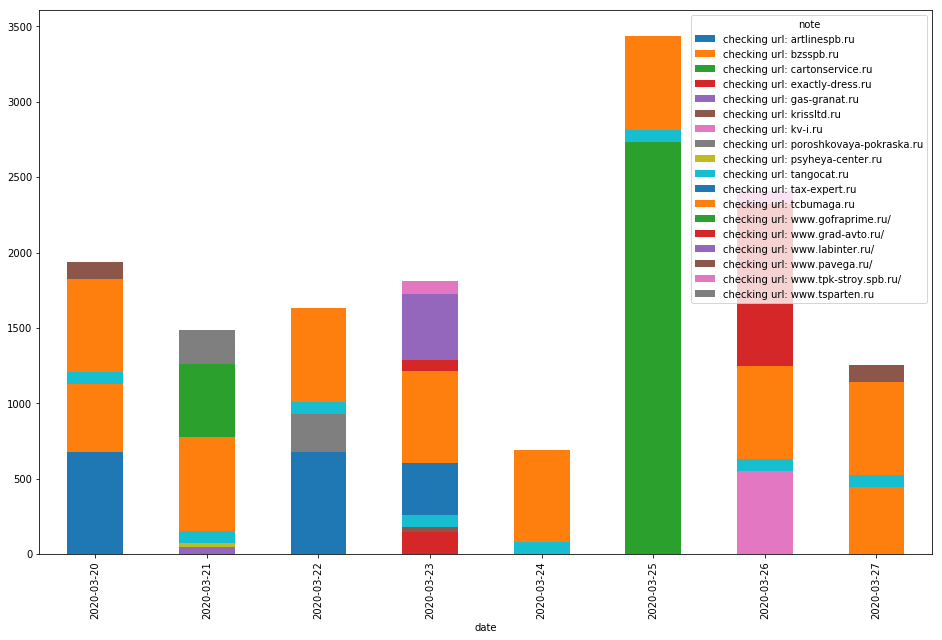

In [22]:
# Гистограмма количества запросов к яндексxml по дням и сайтам
df_w[df_w['note'].apply(lambda note: note[:12] == 'checking url')].pivot_table(values='datetime', index='date', columns='note', aggfunc='count').plot.bar(stacked=True, figsize=(16, 10));

In [23]:
# df_w.info()
# df_week=df_week.reset_index()

# i=0
# print(df_week.shape[0])
# if df_week.loc[i,'note'][:12] == 'checking url':
#     site=df_week.loc[i,'note'][12:]
# df_week.loc[i,'note'][:12]
# type(df_w['datetime'].dt.date[0])

In [24]:
# Анализ ошибок
# df_w[df_w['note'].str.contains('ERROR')].head()

In [25]:
# Счтитаем количество и тип ошибок 
df_w[(df_w['note'].str.contains('error'))|(df_w['note'].str.contains('ERROR'))]['note'].value_counts()

ERROR: Количество запросов, отправленных в течение секунды (RPS), превысило допустимое значение    99
 position: 0, status: load_page_error                                                              99
Name: note, dtype: int64

In [26]:
df_w[(df_w['note'].str.contains('error'))|(df_w['note'].str.contains('ERROR'))][[
    'date', 'note', 'log']].groupby(['date', 'note']).count()

log
date       note                                                   
2020-03-20  position: 0, status: load_page_error                13
           ERROR: Количество запросов, отправленных в тече...   13
2020-03-21  position: 0, status: load_page_error                19
           ERROR: Количество запросов, отправленных в тече...   19
2020-03-22  position: 0, status: load_page_error                17
           ERROR: Количество запросов, отправленных в тече...   17
2020-03-23  position: 0, status: load_page_error                 6
           ERROR: Количество запросов, отправленных в тече...    6
2020-03-24  position: 0, status: load_page_error                 3
           ERROR: Количество запросов, отправленных в тече...    3
2020-03-25  position: 0, status: load_page_error                17
           ERROR: Количество запросов, отправленных в тече...   17
2020-03-26  position: 0, status: load_page_error                15
           ERROR: Количество запросов, отправленных в тече...   15
2020-03-27  position: 0, status: load_page_error                 9
           ERROR: Количество запросов, отправленных в тече...    9

In [ ]:
# df_w[(df_w['note'].str.contains('ERROR'))|(df_w['note'].str.contains('checking'))]['note'].value_counts()

In [ ]:
# Сделать: 1) обращаться лучше по индексу 2) оставить только строки checking and error


# индексы ячеек c сайтом и ошибкой

index = df_w[(df_w['note'].str.contains('error'))|(df_w['note'].str.contains('ERROR'))|(df_w['note'].str.contains(
    'checking'))].index 

from tqdm import tnrange, tqdm_notebook, tqdm

start=0 
stop=len(index)
site=np.nan
for i in tnrange(start, stop, desc='site'):
#     print(i)
    if df_w.loc[index[i],'note'][:12] == 'checking url':
#         print(index[i])
        site=df_w.loc[index[i],'note'][14:]
#         print(site)
    df_w.loc[index[i],'site']=site
    
    
# tnrange(0, 

A Jupyter Widget

C:\Users\George\Anaconda3\lib\site-packages\pandas\core\indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\George\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [ ]:
# Экспорт данных в таблицу
# df_w.to_csv('df_w.csv')
# #df.to_html('to_html')
# # df.to_json('json')
# df_w.to_pickle('df_w.pkl')
# # df_w.to_hdf('df_len_title.h5','table', append=True)
# df_w.head()

In [ ]:
# import pandas as pd
# # df_w=pd.read_csv('df_w.csv')
# # df_week=pd.read_pickle('df_w.pkl')
# df_w.head(100)

In [ ]:
# df_w.tail(50)

In [ ]:
df_w[(df_w['note'].str.contains('error'))|(df_w['note'].str.contains('ERROR'))].groupby('site').count()

In [ ]:

# df_w_s['date'] = df_week['date'].astype('datetime64') 
# # df_w_s.info()
# df_w_s['day']=df_w_s['date'].dt.date
# df_w_s.head()


In [ ]:
df_w[(df_w['note'].str.contains('error'))|(df_w['note'].str.contains('ERROR'))][['date', 'note', 'log']].groupby(
    ['date', 'note']).count()

In [ ]:
# Группировка по дням недели и сайтам
df_w[(df_w['note'].str.contains('error'))|(df_w['note'].str.contains('ERROR'))][['date', 'site', 'note', 'log']].groupby(
    ['date', 'site', 'note']).count()
# Сводная таблица по дням недели и сайтам
# df_w[df_w['note'].str.contains('ERROR')].pivot_table(values='log', index='note', columns='date', aggfunc='count')

In [ ]:
df_w.head(50)

In [ ]:
# %%time
# # сделать: без сортировки по 
# df_w['date']=df_w['datetime'].dt.date

In [ ]:
df_w[(df_w['note'].str.contains('error'))|(
    df_w['note'].str.contains('ERROR'))][['date', 'log']].groupby(['date']).count()


In [ ]:
# экспорт данных
# df_w_s[df_w_s['note'].str.contains('ERROR')].to_csv('df_week_error.csv')



#df.to_html('to_html')
# df.to_json('json')
# df_week.to_pickle('pickle')
# # df_week.to_hdf('df_len_title.h5','table', append=True)
# df_week.head(100)